In [2]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from PIL import Image

dataset_path = r'E:\New folder\Brain_tumor\Brain_Tumer_Data'
categories = os.listdir(dataset_path)
print(f"Classes: {categories}")

# Image counts
for category in categories:
    count = len(os.listdir(os.path.join(dataset_path, category)))
    print(f"{category}: {count} images")


Classes: ['Testing', 'Training']
Testing: 4 images
Training: 4 images


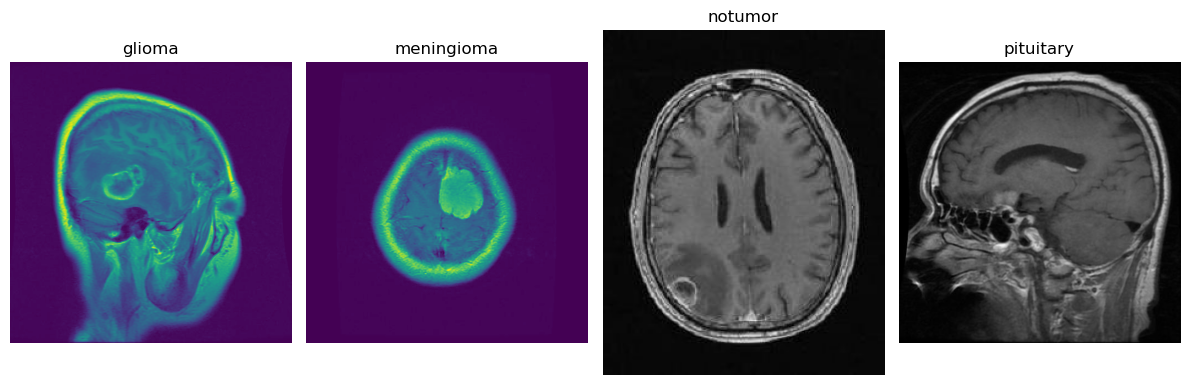

In [4]:
import random
import os
from PIL import Image
import matplotlib.pyplot as plt

# Adjust this to point to 'Training' or 'Testing' folder
root_folder = os.path.join(dataset_path, "Training")  # or "Testing"
categories = os.listdir(root_folder)

plt.figure(figsize=(12, 6))
for i, category in enumerate(categories):
    category_folder = os.path.join(root_folder, category)
    image_files = [f for f in os.listdir(category_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    if not image_files:
        continue  # Skip if no images found in the category folder

    random_image = random.choice(image_files)
    img_path = os.path.join(category_folder, random_image)

    try:
        img = Image.open(img_path)
        plt.subplot(1, 4, i+1)
        plt.imshow(img)
        plt.title(category)
        plt.axis('off')
    except Exception as e:
        print(f"Error loading image {img_path}: {e}")

plt.tight_layout()
plt.show()


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def load_data(data_path, img_size=(224, 224), batch_size=32):
    datagen = ImageDataGenerator(
        rescale=1.0/255,
        validation_split=0.2,               # 20% of Training data used for validation
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    train_data = datagen.flow_from_directory(
        data_path,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset='training',
        shuffle=True
    )

    val_data = datagen.flow_from_directory(
        data_path,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset='validation',
        shuffle=True
    )

    return train_data, val_data


In [10]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


In [11]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # prevent overfitting

    layers.Dense(4, activation='softmax')  # 4 output classes
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


c:\Users\Jdeep\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,476 (42.61 MB)

 Trainable params: 11,169,476 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def load_data(data_path, img_size=(224, 224), batch_size=32):
    datagen = ImageDataGenerator(
        rescale=1.0/255,
        validation_split=0.2,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    train_data = datagen.flow_from_directory(
        data_path,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset='training',
        shuffle=True
    )

    val_data = datagen.flow_from_directory(
        data_path,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset='validation',
        shuffle=True
    )

    return train_data, val_data


In [16]:
data_path = r"E:\New folder\Brain_tumor\Brain_Tumer_Data\Training"
train_data, val_data = load_data(data_path)


Found 4571 images belonging to 4 classes.
Found 1141 images belonging to 4 classes.


In [17]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

checkpoint = ModelCheckpoint(
    "custom_cnn.h5",
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

early_stop = EarlyStopping(patience=5, restore_best_weights=True)

history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=20,
    callbacks=[checkpoint, early_stop]
)


c:\Users\Jdeep\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4599 - loss: 1.1723
Epoch 1: val_accuracy improved from -inf to 0.61525, saving model to custom_cnn.h5


143/143 ━━━━━━━━━━━━━━━━━━━━ 260s 2s/step - accuracy: 0.4605 - loss: 1.1712 - val_accuracy: 0.6152 - val_loss: 1.0248
Epoch 2/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6208 - loss: 0.8544
Epoch 2: val_accuracy improved from 0.61525 to 0.68273, saving model to custom_cnn.h5


143/143 ━━━━━━━━━━━━━━━━━━━━ 189s 1s/step - accuracy: 0.6210 - loss: 0.8541 - val_accuracy: 0.6827 - val_loss: 0.8629
Epoch 3/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6931 - loss: 0.7335
Epoch 3: val_accuracy improved from 0.68273 to 0.70289, saving model to custom_cnn.h5


143/143 ━━━━━━━━━━━━━━━━━━━━ 187s 1s/step - accuracy: 0.6932 - loss: 0.7335 - val_accuracy: 0.7029 - val_loss: 0.8727
Epoch 4/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 977ms/step - accuracy: 0.7198 - loss: 0.6986
Epoch 4: val_accuracy did not improve from 0.70289
143/143 ━━━━━━━━━━━━━━━━━━━━ 156s 1s/step - accuracy: 0.7197 - loss: 0.6987 - val_accuracy: 0.6784 - val_loss: 0.9092
Epoch 5/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 924ms/step - accuracy: 0.7399 - loss: 0.6553
Epoch 5: val_accuracy did not improve from 0.70289
143/143 ━━━━━━━━━━━━━━━━━━━━ 148s 1s/step - accuracy: 0.7398 - loss: 0.6554 - val_accuracy: 0.7011 - val_loss: 0.8830
Epoch 6/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 925ms/step - accuracy: 0.7531 - loss: 0.6196
Epoch 6: val_accuracy improved from 0.70289 to 0.70465, saving model to custom_cnn.h5


143/143 ━━━━━━━━━━━━━━━━━━━━ 149s 1s/step - accuracy: 0.7531 - loss: 0.6195 - val_accuracy: 0.7046 - val_loss: 0.8607
Epoch 7/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 945ms/step - accuracy: 0.7870 - loss: 0.5605
Epoch 7: val_accuracy improved from 0.70465 to 0.72305, saving model to custom_cnn.h5


143/143 ━━━━━━━━━━━━━━━━━━━━ 151s 1s/step - accuracy: 0.7869 - loss: 0.5607 - val_accuracy: 0.7230 - val_loss: 0.7350
Epoch 8/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.7856 - loss: 0.5663
Epoch 8: val_accuracy improved from 0.72305 to 0.72656, saving model to custom_cnn.h5


143/143 ━━━━━━━━━━━━━━━━━━━━ 561s 4s/step - accuracy: 0.7856 - loss: 0.5663 - val_accuracy: 0.7266 - val_loss: 0.7528
Epoch 9/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 920ms/step - accuracy: 0.7960 - loss: 0.5407
Epoch 9: val_accuracy improved from 0.72656 to 0.73444, saving model to custom_cnn.h5


143/143 ━━━━━━━━━━━━━━━━━━━━ 147s 1s/step - accuracy: 0.7960 - loss: 0.5407 - val_accuracy: 0.7344 - val_loss: 0.8272
Epoch 10/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 873ms/step - accuracy: 0.7903 - loss: 0.5296
Epoch 10: val_accuracy did not improve from 0.73444
143/143 ━━━━━━━━━━━━━━━━━━━━ 139s 971ms/step - accuracy: 0.7904 - loss: 0.5295 - val_accuracy: 0.7082 - val_loss: 0.7390
Epoch 11/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 905ms/step - accuracy: 0.8064 - loss: 0.5093
Epoch 11: val_accuracy did not improve from 0.73444
143/143 ━━━━━━━━━━━━━━━━━━━━ 144s 1s/step - accuracy: 0.8063 - loss: 0.5093 - val_accuracy: 0.6801 - val_loss: 0.8938
Epoch 12/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 875ms/step - accuracy: 0.8013 - loss: 0.5280
Epoch 12: val_accuracy improved from 0.73444 to 0.73707, saving model to custom_cnn.h5


143/143 ━━━━━━━━━━━━━━━━━━━━ 140s 975ms/step - accuracy: 0.8013 - loss: 0.5281 - val_accuracy: 0.7371 - val_loss: 0.7666


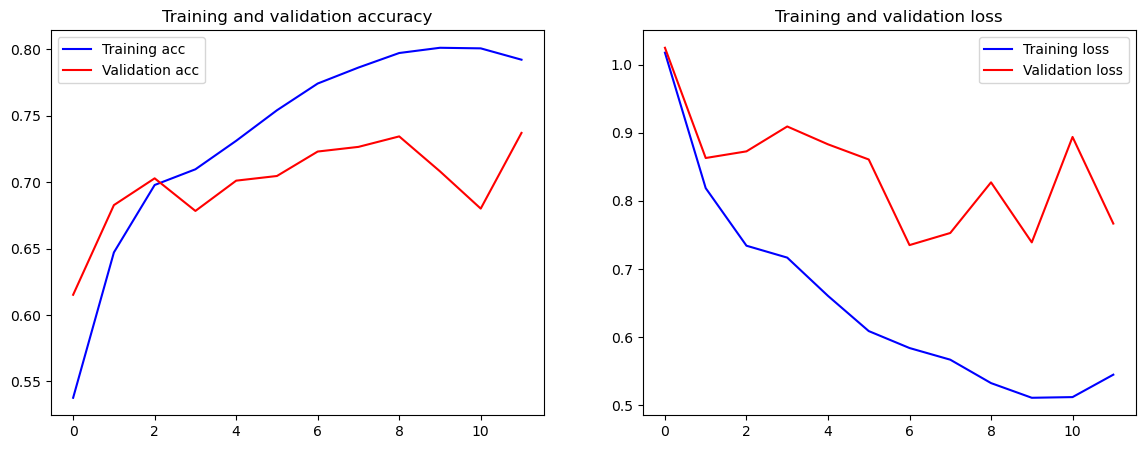

In [18]:
import matplotlib.pyplot as plt

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training acc')
    plt.plot(epochs, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

plot_history(history)


36/36 ━━━━━━━━━━━━━━━━━━━━ 21s 525ms/step
Classification Report:

              precision    recall  f1-score   support

      glioma       0.23      0.16      0.19       264
  meningioma       0.23      0.26      0.24       267
     notumor       0.29      0.34      0.31       319
   pituitary       0.26      0.24      0.25       291

    accuracy                           0.26      1141
   macro avg       0.25      0.25      0.25      1141
weighted avg       0.25      0.26      0.25      1141



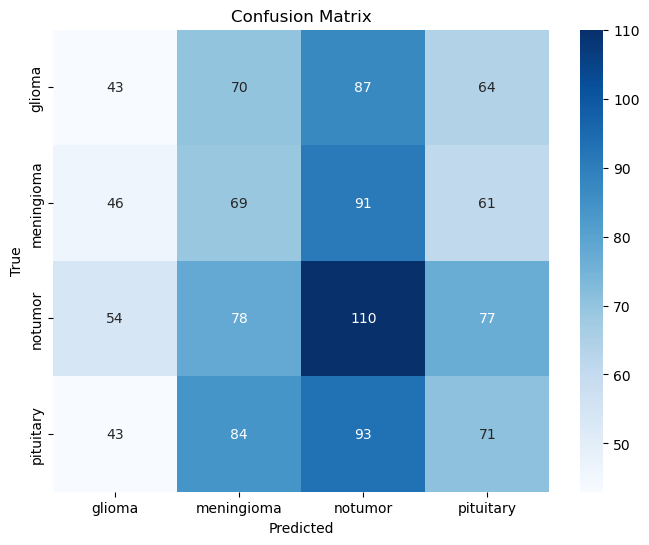

In [19]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Get predictions
val_preds = model.predict(val_data)
y_pred = np.argmax(val_preds, axis=1)
y_true = val_data.classes
class_labels = list(val_data.class_indices.keys())

# Classification Report
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_labels))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step


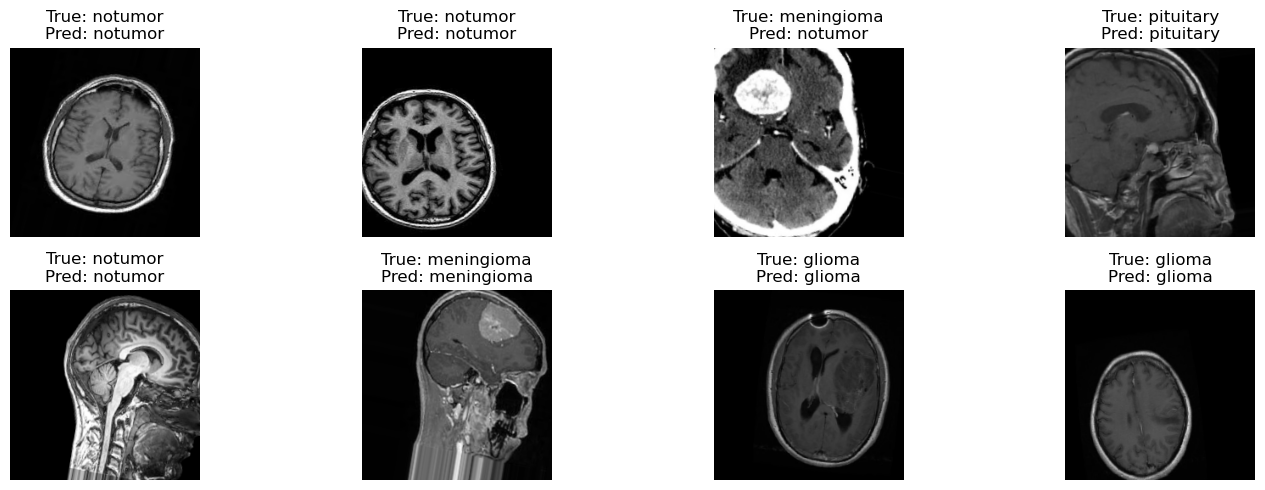

In [20]:
import matplotlib.pyplot as plt

def show_sample_predictions(model, data, class_labels, n=8):
    x_batch, y_batch = next(data)  # Get one batch
    y_pred = model.predict(x_batch)
    pred_labels = np.argmax(y_pred, axis=1)
    true_labels = np.argmax(y_batch, axis=1)

    plt.figure(figsize=(15, 5))
    for i in range(n):
        plt.subplot(2, n//2, i+1)
        plt.imshow(x_batch[i])
        plt.title(f"True: {class_labels[true_labels[i]]}\nPred: {class_labels[pred_labels[i]]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Call the function
show_sample_predictions(model, val_data, class_labels)


In [21]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam

# Load ResNet50 base model (exclude top dense layers)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [22]:
# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(train_data.num_classes, activation='softmax')(x)

# Final model
resnet_model = Model(inputs=base_model.input, outputs=predictions)


In [23]:
resnet_model.compile(optimizer=Adam(learning_rate=1e-4),
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])


In [26]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Callbacks
checkpoint_resnet = ModelCheckpoint("resnet_best_model.h5", monitor='val_accuracy', save_best_only=True, verbose=1)
early_stop_resnet = EarlyStopping(patience=5, restore_best_weights=True)

# Train
resnet_history = resnet_model.fit(
    train_data,
    validation_data=val_data,
    epochs=5,
    callbacks=[checkpoint_resnet, early_stop_resnet]
)


Epoch 1/5
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4909 - loss: 1.0711
Epoch 1: val_accuracy improved from -inf to 0.52323, saving model to resnet_best_model.h5


143/143 ━━━━━━━━━━━━━━━━━━━━ 302s 2s/step - accuracy: 0.4910 - loss: 1.0710 - val_accuracy: 0.5232 - val_loss: 1.1975
Epoch 2/5
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4990 - loss: 1.0726
Epoch 2: val_accuracy did not improve from 0.52323
143/143 ━━━━━━━━━━━━━━━━━━━━ 284s 2s/step - accuracy: 0.4991 - loss: 1.0725 - val_accuracy: 0.5180 - val_loss: 1.1918
Epoch 3/5
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5162 - loss: 1.0545
Epoch 3: val_accuracy did not improve from 0.52323
143/143 ━━━━━━━━━━━━━━━━━━━━ 321s 2s/step - accuracy: 0.5163 - loss: 1.0543 - val_accuracy: 0.4864 - val_loss: 1.1592
Epoch 4/5
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5543 - loss: 1.0261
Epoch 4: val_accuracy did not improve from 0.52323
143/143 ━━━━━━━━━━━━━━━━━━━━ 326s 2s/step - accuracy: 0.5542 - loss: 1.0261 - val_accuracy: 0.5188 - val_loss: 1.1610
Epoch 5/5
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5393 - loss: 1.0278
Epoch 5: val_accuracy did not improve f

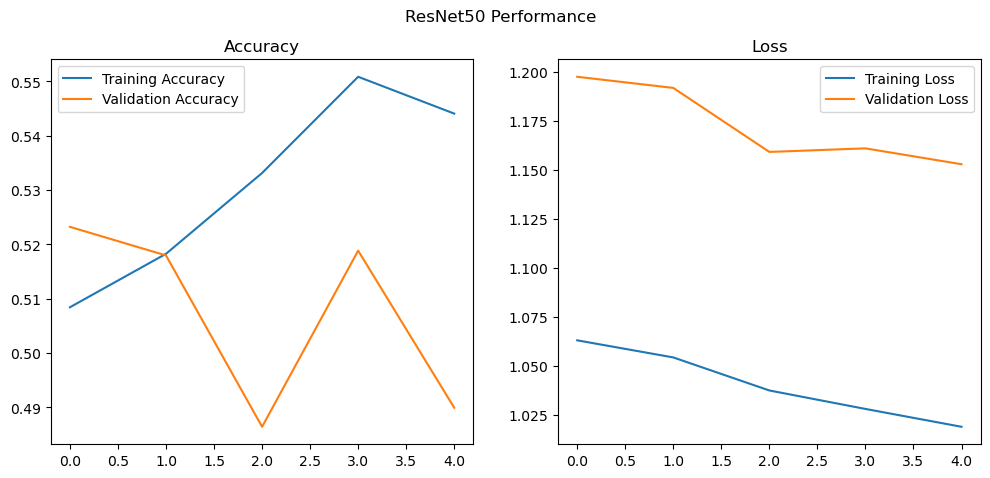

In [27]:
import matplotlib.pyplot as plt

def plot_training_history(history, title='Model Accuracy & Loss'):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend()
    plt.title('Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend()
    plt.title('Loss')

    plt.suptitle(title)
    plt.show()

plot_training_history(resnet_history, title='ResNet50 Performance')


36/36 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step
Classification Report:

              precision    recall  f1-score   support

      glioma       0.17      0.05      0.08       264
  meningioma       0.22      0.10      0.13       267
     notumor       0.25      0.20      0.22       319
   pituitary       0.24      0.58      0.34       291

    accuracy                           0.24      1141
   macro avg       0.22      0.23      0.19      1141
weighted avg       0.22      0.24      0.20      1141



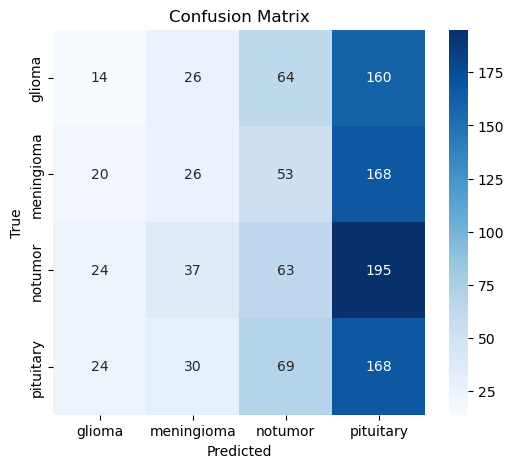

In [28]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns

# Predict on validation data
val_preds = resnet_model.predict(val_data)
y_pred = np.argmax(val_preds, axis=1)
y_true = val_data.classes

# Get class labels
class_labels = list(val_data.class_indices.keys())

# Classification Report
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_labels))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


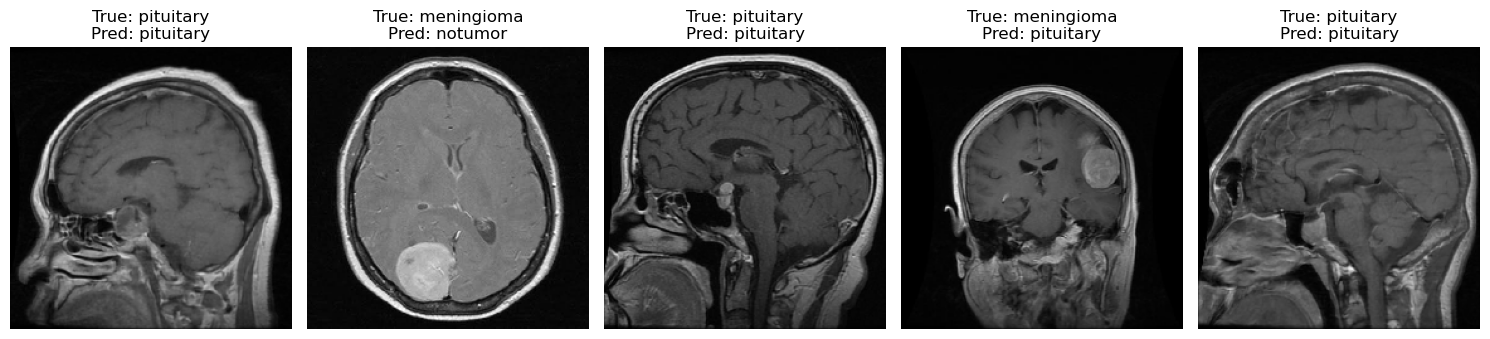

In [29]:
import random

def show_predictions(model, data, class_names, num_images=5):
    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        idx = random.randint(0, len(data.filenames) - 1)
        img_path = os.path.join(data.directory, data.filenames[idx])
        img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
        img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        prediction = model.predict(img_array)
        predicted_class = class_names[np.argmax(prediction)]
        true_class = data.filenames[idx].split(os.sep)[0]

        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.title(f"True: {true_class}\nPred: {predicted_class}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()

show_predictions(resnet_model, val_data, class_labels, num_images=5)


In [30]:
resnet_model.save("model/resnet_model.h5")


In [31]:
import os
import streamlit
print(os.path.dirname(streamlit.__file__))


C:\Users\Jdeep\AppData\Roaming\Python\Python311\site-packages\streamlit
